# Using linear regression to model OLED


1- Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

import data

In [8]:
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='Sheet3')
df = df.fillna(value=0)
X = df[list(df.columns)[:-5]]
y = df.iloc[:, -1:]

#display data 
X.head()
y.head()

,cd/a
0,28.24
1,40.80
2,26.30
3,3.38
4,1.00


In [9]:
X = preprocessing.scale(X)
y = preprocessing.scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [10]:
regressor = AdaBoostRegressor(base_estimator=None, n_estimators=100, learning_rate=1.0,
                              loss='linear', random_state=None)

In [11]:
regressor.fit(X_train, y_train.ravel())
y_predictions = regressor.predict(X_test)

# print(regressor.feature_importances_)
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.539395802189


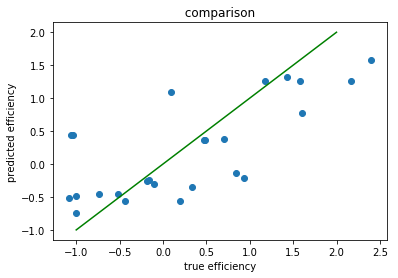

In [12]:
plt.scatter(y_test, y_predictions)
plt.plot([-1, 2], [-1, 2], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [14]:
# print predicted value and actual value
y_test = y_test.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %s,  Actual: %s' % (prediction, y_test[i]))

Predicted: -0.343179009569, Actual: [0.33224204684861586]
Predicted: 1.31673781548, Actual: [1.42646608172985]
Predicted: -0.457457374552, Actual: [-0.7361748173986268]
Predicted: -0.491006696376, Actual: [-1.004569391992137]
Predicted: 1.25835079874, Actual: [1.1735558095167347]
Predicted: -0.261440183054, Actual: [-0.1890627999580097]
Predicted: 1.08691745096, Actual: [0.09481607701589535]
Predicted: -0.448830406082, Actual: [-0.5193945840730992]
Predicted: 1.25581616591, Actual: [1.576147671407]
Predicted: -0.236806065631, Actual: [-0.15809419519722018]
Predicted: -0.746497685652, Actual: [-0.9999241012780186]
Predicted: -0.558664495388, Actual: [-0.43629549463164696]
Predicted: 0.3709528028, Actual: [0.48708507065256407]
Predicted: -0.133577383095, Actual: [0.8432240254016449]
Predicted: -0.565847491214, Actual: [0.19494789907578175]
Predicted: 0.777415740285, Actual: [1.596793407914193]
Predicted: -0.515523508478, Actual: [-1.088184624846269]
Predicted: -0.211298816169, Actual: [0